# Deel 2 : Autoproductie 

# A : nodige modules

In [1]:
# standaard in python
import os 
import datetime
import sys
import random
import calendar
import gzip


In [2]:
# te installeren packages en modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.stats import weibull_min
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import pareto
from scipy.stats import beta

from scipy import stats as st

from sklearn.linear_model import LinearRegression

from tqdm import tqdm

import seaborn as sns

In [3]:
# eigen packages modules
current_working_directory = os.getcwd()                                    
parent_working_directory = os.path.dirname(current_working_directory)      
scripts_directory = os.path.join(parent_working_directory, 'scripts')      
sys.path.append(scripts_directory)                                         
# sys.path.remove(scripts_directory)
# print(sys.path)

import come_in_handy as cih
import verkoop_prijspercentiel as vpp
import verkoop_bereken_CI as vbCI
import my_matplotlib_standards as mypltstd


In [4]:
# eigen standard set up uitvoering
mypltstd.my_matplotlib_pyplot_standards_setup()

# B : functies nog niet in modules

# C : opladen van de gegevens

In [5]:
autoproductie = pd.read_csv("../data/raw/autoproductie/cars.csv")
#  9145 duplicate rows were found
autoproductie.drop_duplicates(inplace=True)
autoproductie_cleaned_fueltypes = autoproductie.dropna(subset=['fuel_type'])


# D : een 1ste controle van de gegevens

In [6]:
autoproductie  # gebruik ook Data Wrangler

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [7]:
autoproductie.shape

(752946, 20)

In [8]:
autoproductie.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [9]:
autoproductie.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       762081, 762082, 762083, 762084, 762085, 762086, 762087, 762088, 762089,
       762090],
      dtype='int64', length=752946)

In [10]:
autoproductie.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [11]:
autoproductie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752946 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         752946 non-null  object 
 1   model                752946 non-null  object 
 2   year                 752946 non-null  int64  
 3   mileage              752468 non-null  float64
 4   engine               738491 non-null  object 
 5   transmission         743467 non-null  object 
 6   drivetrain           732055 non-null  object 
 7   fuel_type            730793 non-null  object 
 8   mpg                  613056 non-null  object 
 9   exterior_color       744224 non-null  object 
 10  interior_color       697081 non-null  object 
 11  accidents_or_damage  729288 non-null  float64
 12  one_owner            722176 non-null  float64
 13  personal_use_only    728652 non-null  float64
 14  seller_name          744451 non-null  object 
 15  seller_rating        5

In [12]:
autoproductie.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,752946.000000,7.524680e+05,729288.000000,722176.000000,728652.000000,541438.000000,721666.000000,752946.000000,406236.000000,7.529460e+05
mean,2017.790013,5.579103e+04,0.228017,0.562032,0.657201,4.159330,4.623590,89.692752,1007.430934,3.520899e+04
std,5.114479,4.354112e+04,0.419554,0.496137,0.474645,0.804872,0.276817,115.374787,1374.759058,1.629960e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.330500e+04,0.000000,0.000000,0.000000,3.800000,4.500000,13.000000,380.000000,1.959500e+04
50%,2019.000000,4.561400e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,643.000000,2.799000e+04
75%,2021.000000,7.836800e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


In [13]:
autoproductie.describe(include = "all") 

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,752946,752946,752946.000000,7.524680e+05,738491,743467,732055,730793,613056,744224,697081,729288.000000,722176.000000,728652.000000,744451,541438.000000,721666.000000,752946.000000,406236.000000,7.529460e+05
unique,30,12187,NaN,NaN,6903,1313,33,36,865,7681,4679,NaN,NaN,NaN,18254,NaN,NaN,NaN,NaN,NaN
top,Ford,Fusion SE,NaN,NaN,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,19-26,Black,Black,NaN,NaN,NaN,Gateway Classic Cars,NaN,NaN,NaN,NaN,NaN
freq,78851,3172,NaN,NaN,74823,146979,238528,637168,15955,59562,283070,NaN,NaN,NaN,1628,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.790013,5.579103e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.228017,0.562032,0.657201,NaN,4.159330,4.623590,89.692752,1007.430934,3.520899e+04
std,NaN,NaN,5.114479,4.354112e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419554,0.496137,0.474645,NaN,0.804872,0.276817,115.374787,1374.759058,1.629960e+06
min,NaN,NaN,1915.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,NaN,NaN,2016.000000,2.330500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,3.800000,4.500000,13.000000,380.000000,1.959500e+04
50%,NaN,NaN,2019.000000,4.561400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,4.500000,4.700000,51.000000,643.000000,2.799000e+04
75%,NaN,NaN,2021.000000,7.836800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,4.700000,4.800000,119.000000,1007.000000,3.948800e+04


# E : deelset met enkel Volvo's

In [14]:
df_volvos = autoproductie.loc[autoproductie['manufacturer'] == 'Volvo'].copy()
# 81 duplicates were found and removed already with autoproductie.drop_duplicates(inplace=True) 
# df_volvos.drop_duplicates(inplace=True)

# zie ook verder vraag 3 en de tekening uit de opgave en de opmerkingen in de klas (collega studenten)
df_volvos_skewed = df_volvos.loc[df_volvos['price'] >= 35000]
df_volvos.describe(include = "all") 

# This part only because of stacked bar chart, over price distribution
min_price = df_volvos['price'].min()
max_price = df_volvos['price'].max()
my_own_bins = 20
interval_width = (max_price - min_price) / my_own_bins
df_volvos['price_group'] = (df_volvos['price'] // interval_width) # in groepen van 2500 $

# F : vragen en antwoorden

## Vraag 1 : Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? 
Motiveer je antwoord.

### Antwoord
<span style="color:CadetBlue">  

- atribuut year bevat categorische ordinale data  

motivatie : het attibuut is niet numerisch vermits jaren niet opgeteld kunnen worden en is daarom eerder categorisch, ook omdat jaren (in dage geteld) niet steeds even groot zijn. Opgelet: met jaren kunnen tijdsafhankelijke berekeningen worden uitgevoerd, in dat kader kàn het numerisch zijn. Niet in het kader van deze vraag en oefening, naar mijn mening. Het is ordinaal omdat jaren een logische - in dit geval chronologische - volgorde hebben.

- atribuut fueltype bevat categorische niet ordinale data  

motivatie : na onderzoek is vast te stellen dat de gegevens in het atribuut fueltype van het nominale type zijn vermits er geen ranschikking of volgorde mogelijk is. Er is wel wat overlap in betekenis van de gebruikte waardes ('Gas', 'Gasoline') alsook vreemde anomaliën zoals 'automatic', 'G'.

- atribuut seller_rating bevat categorische ordinale data

motivatie : ratings zijn niet numeriek in dit geval vermits ze niet opgeteld of numerisch benaderd kunnen worden. Dat heeft geen zin. Ze zijn hier categorisch (tussen waarden 1.0 en 5.0) en ordinaal omdat een rating van 5.0 een 'betere' ofte hogere waardering geeft 

</span>

### Onderzoek


#### 1.1. onderzoek atribuut 'year'

In [15]:
cih.show_info_about_column(autoproductie, 'year')
cih.show_info_about_column(df_volvos, 'year')

----- None -- year -----------------------------------
df[col].describe(include='all') = count    752946.000000
mean       2017.790013
std           5.114479
min        1915.000000
25%        2016.000000
50%        2019.000000
75%        2021.000000
max        2024.000000
Name: year, dtype: float64 

----- None -- year -----------------------------------
df[col].nunique(dropna=True) = 100 
 
----- None -- year -----------------------------------
df[col].value_counts() = year
2020    131964
2021    107666
2019    104690
2022     79771
2018     62148
         ...  
1934         1
1935         1
1919         1
1917         1
1942         1
Name: count, Length: 100, dtype: int64 
 
----- end of query --------------------------------------------------
----- None -- year -----------------------------------
df[col].describe(include='all') = count    9948.000000
mean     2018.847306
std         3.722654
min      1979.000000
25%      2018.000000
50%      2020.000000
75%      2021.000000
max    

#### 1.2. onderzoek atribuut 'fueltype'

In [16]:
cih.show_info_about_column(autoproductie, 'fuel_type')
cih.show_info_about_column(df_volvos, 'fuel_type')

----- None -- fuel_type -----------------------------------
df[col].describe(include='all') = count       730793
unique          36
top       Gasoline
freq        637168
Name: fuel_type, dtype: object 

----- None -- fuel_type -----------------------------------
df[col].nunique(dropna=True) = 36 
 
----- None -- fuel_type -----------------------------------
df[col].value_counts() = fuel_type
Gasoline                         637168
Hybrid                            28926
Diesel                            27681
E85 Flex Fuel                     18518
Electric                          16117
B                                  1410
Flexible Fuel                       468
Plug-In Hybrid                      118
Gasoline Fuel                        77
Gasoline/Mild Electric Hybrid        70
Regular Unleaded                     54
Premium Unleaded                     48
G                                    44
Compressed Natural Gas               29
Unspecified                          25
Diese

#### 1.3. onderzoek atribuut 'seller_rating'

In [17]:
cih.show_info_about_column(autoproductie, 'seller_rating')
cih.show_info_about_column(df_volvos, 'seller_rating')

----- None -- seller_rating -----------------------------------
df[col].describe(include='all') = count    541438.000000
mean          4.159330
std           0.804872
min           1.000000
25%           3.800000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64 

----- None -- seller_rating -----------------------------------
df[col].nunique(dropna=True) = 41 
 
----- None -- seller_rating -----------------------------------
df[col].value_counts() = seller_rating
4.8    63617
4.7    55669
4.9    50512
4.6    48594
4.5    40032
4.4    30307
4.3    26044
4.2    21688
4.1    17899
5.0    16729
4.0    16265
3.9    16077
3.8    12031
3.6    11272
3.7    10836
3.3    10116
3.4     9451
3.5     9361
3.1     7568
3.2     6390
3.0     6203
2.8     5946
2.6     5066
2.9     4911
2.7     4691
2.4     4280
2.5     4188
1.8     3828
2.2     3693
2.3     2904
1.9     2883
2.1     2878
1.7     1887
2.0     1586
1.6     1450
1.5     1339
1.3     

## Vraag 2 : Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. 
Kan je deze zoeken en tonen?

### Antwoord

<span style="color:CadetBlue">  

De vraagstelling is ambigue. Wat is precies een 'gewoonlijke'? En wat wordt bedoeld met 'er uit ziet' ? 'Hoe ziet een prijs er uit?' Duur? Groot? Redelijk? In vergelijking met wat ? Er zijn hier heel wat mogelijke antwoorden. Vermits vraag 3 in gaat op Volvos, ga ik er van uit dat hier de gemiddelde prijs van een Volvo t.o.v. andere merken/fabricanten wordt bedoeld en er niet verder wordt gedetailleerd per (wagen)model. Zie meer bij het deel 'onderzoek' bij deze vraag deel en de gemaakte afbeeldingen er over.

</span>

### Onderzoek

In [18]:
# cih.show_info_about_column(autoproductie, 'manufacturer')

print(f'# missing prices in autoproductie dataset {autoproductie['price'].isnull().any()}')
print("price contains at least one zero value.") if autoproductie['price'].eq(0).any() else print("price contains not one single zero value.")
print(f"gemiddelde prijs van een wagen by een fabrikant is {autoproductie['price'].mean()}")
print(f"gemiddelde prijs van een wagen by Volvo is {df_volvos['price'].mean()}")

#  dit kon ook worden geobserveerd via data wrangler
#  dit betekent dat het veilig is het gemiddelde te zoeken van de prijs over de meken (vermits je 'Volvo' vernoemt en niet een modelnaam van Volvo)

# bereken gemiddelde prijs per fabrikant en sorteer 
autoproductie_gemiddelde_prijs_per_fabrikant = (autoproductie.groupby('manufacturer')['price']
                                                .mean()
                                                .sort_values(ascending=False))

autoproductie_gemiddelde_prijs_per_fabrikant.reset_index().set_index('manufacturer')
prijs_rang = autoproductie_gemiddelde_prijs_per_fabrikant.index.get_loc('Volvo')
rijen = len(autoproductie_gemiddelde_prijs_per_fabrikant)
percentiel_volvo = vpp.bereken_percentiel_voor_rang(prijs_rang, rijen)
print(f"Volvo is {prijs_rang}de en zit in de {percentiel_volvo:.2f}% percentiel")

# missing prices in autoproductie dataset False
price contains not one single zero value.
gemiddelde prijs van een wagen by een fabrikant is 35208.99134466482
gemiddelde prijs van een wagen by Volvo is 35777.50904704463
Volvo is 11de en zit in de 36.67% percentiel


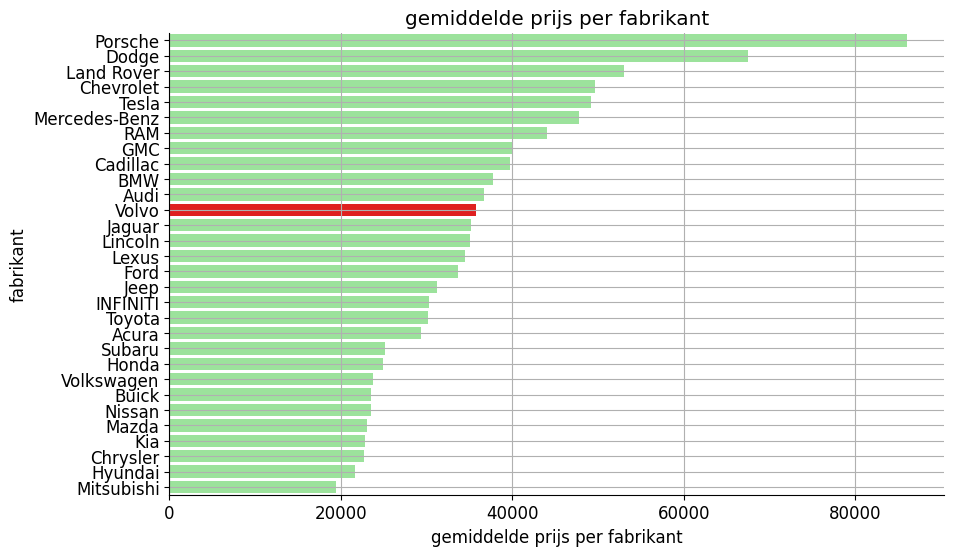

In [19]:
# plot barchart 
#  hier heb ik wel de hulp van chatgpt ingeroepen
# plt.figure(figsize=(8, 14))
colors = ['red' if m == 'Volvo' else 'lightgreen' for m in autoproductie_gemiddelde_prijs_per_fabrikant.index]
ax = (sns.barplot(x=autoproductie_gemiddelde_prijs_per_fabrikant.values, 
                  y=autoproductie_gemiddelde_prijs_per_fabrikant.index, 
                  hue=autoproductie_gemiddelde_prijs_per_fabrikant.index, 
                  palette=colors ))
plt.xlabel('gemiddelde prijs per fabrikant')
plt.ylabel('fabrikant')
plt.title('gemiddelde prijs per fabrikant')
plt.grid(True)
plt.show()

## Vraag 3 : We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

### Antwoord

<span style="color:CadetBlue">  

- Bij een normale verdeling van de prijzen verwacht ik dat het gemiddelde en de mediaan vermoedelijk in 'het midden' liggen.
- Echter, op basis van de tekening in de opgave zien we een tekening die skewed is. dan zal gemiddelde en mediaan vermoedelijk ook skewed zijn.
- Dat laatste is ook zichtbaar in de skewed grafiek met Volvo's>35k (zie opgave) waar gemiddelde en mediaan naar links 'hellen'  
vermits de Volvo's die < 35000 $ kosten verwijderd werden.  
- Je ziet ook dat de hoogte van de blokken van het histogram voor skewed 'lager' zijn, vermits er minder wagens in zitten.
- Opmerking : links en rechts zijn relatief : 
    - links t.o.v. de gegevens Volvo's > 35000, echter ... 
    - naar rechts geschoven t.o.v. het gemiddelde en mediaan over alle Volvo wagens.
- Daarom wordt voor dit deel ook de dataframe df_volvos_skewed gebruikt (Volvo's > 35000 )
- De 2 histogrammen en hun bijbehorende ecdf's vind je verder in het onderdeel 'onderzoek' van het antwoord

</span>

### Onderzoek

In [20]:
gemiddelde_alles = df_volvos['price'].mean()
mediaan_alles = df_volvos['price'].median()
modus_alles = df_volvos['price'].mode().iloc[0]

gemiddelde_skewed = df_volvos_skewed['price'].mean()
mediaan_skewed = df_volvos_skewed['price'].median()
modus_skewed = df_volvos_skewed['price'].mode().iloc[0]

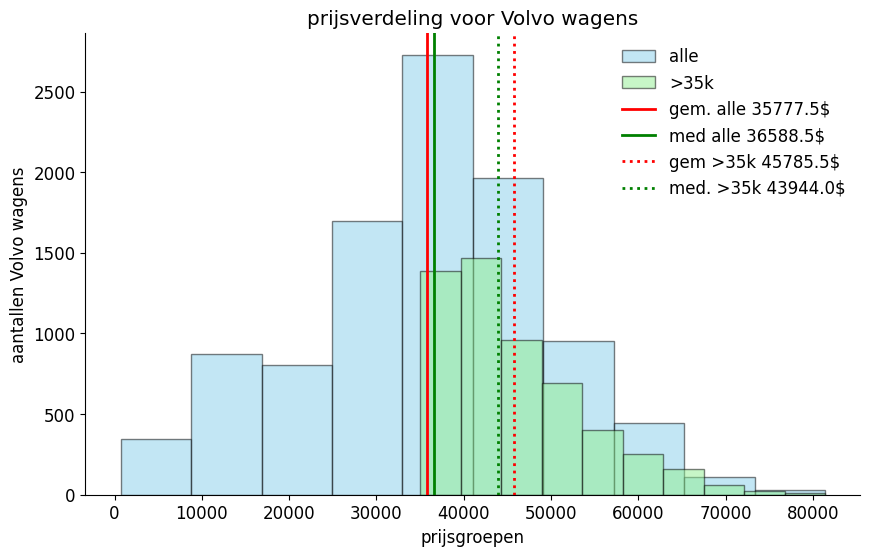

In [21]:
#  dit gaat enkel over volvo's
plt.hist(df_volvos['price'], bins=10, color='skyblue', edgecolor='black', alpha=0.5, label="alle")
plt.hist(df_volvos_skewed['price'], bins=10, color='lightgreen', edgecolor='black', alpha=0.5, label=">35k")

plt.xlabel('prijsgroepen')
plt.ylabel('aantallen Volvo wagens')
plt.title('prijsverdeling voor Volvo wagens')
          
plt.axvline(gemiddelde_alles, linewidth=2,color='r', label = f'gem. alle {gemiddelde_alles:.1f}$')
plt.axvline(mediaan_alles, linewidth=2,color='g', label = f'med alle {mediaan_alles:.1f}$')
# plt.axvline(modus_alles, linewidth=2,color='b', label = f'modus {modus_alles:.1f}')

plt.axvline(gemiddelde_skewed, linewidth=2,color='r', linestyle=':', label = f'gem >35k {gemiddelde_skewed:.1f}$')
plt.axvline(mediaan_skewed, linewidth=2,color='g', linestyle=':', label = f'med. >35k {mediaan_skewed:.1f}$')
# plt.axvline(modus_skewed, linewidth=2,color='b', linestyle=':', label = f'modus {modus_skewed:.1f}')

plt.legend()          
plt.show()

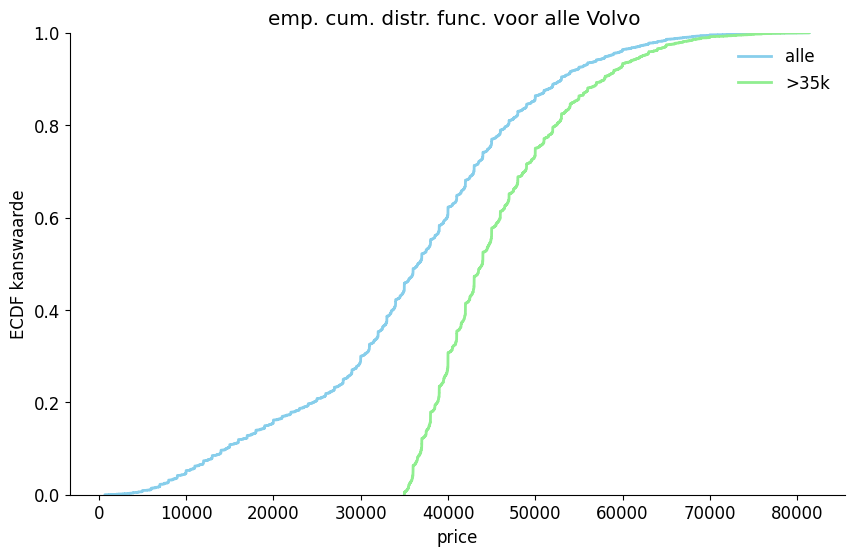

In [22]:
# plt.figure(figsize=(6, 4))
sns.ecdfplot(data=df_volvos, x='price', color='skyblue', linewidth=2, label=f"alle")
sns.ecdfplot(data=df_volvos_skewed, x='price', color='lightgreen', linewidth=2, label=f">35k")

plt.xlabel('price')
plt.ylabel('ECDF kanswaarde')
plt.title('emp. cum. distr. func. voor alle Volvo ')

# plt.grid(True)
plt.legend()     
plt.show()

## Vraag 4 : Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. 
Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?

### Antwoord

<span style="color:CadetBlue">  

Ik ga er even van uit dat de vraag 'hoe kunnen we DEZE beter maken' van toepassing is op de vorm van de histogrammen en niet op de fueltype gegevens zelf.  
Want die fueltypes lijken me een allegaartje van slecht gecategoriseerde gegevens die inderdaad 'beter' kunnen gemaakt worden.

Naast de 2 histogrammen die ik herneem (eentje via sns), maak ik zelf nog een stacked bar chart, omdat ik dat duidelijk en beter vind. Het geeft - naar mening - beter weer wat de relativiteit is per prijs klasse. Ik maak (eerder hierboven) een price_group manueel, zaosl de optie bins= dat doet op histgrammen. Daarna tel ik de voorkomens van de 3 fuel types per prijsklasse, join dat in één groot dataframe (omdat ik de 0 waarden nodig heb per price-group) en gebruik dan de kolommen als list objecten in de plt.bar python instructie. De stacked bar chart fungeert de facto ineens als histogram, denk ik. Zo heb ik het tenminste toch bedoeld.

Van de fuel types maak ik bij vraag 5 ook nog ecdf charts.


</span>

### Onderzoek

In [23]:
selection_gasoline = df_volvos.loc[df_volvos['fuel_type'] == 'Gasoline', ['fuel_type', 'price', 'price_group']]
selection_electric = df_volvos.loc[df_volvos['fuel_type'] == 'Electric', ['fuel_type', 'price', 'price_group']]
selection_hybrid = df_volvos.loc[df_volvos['fuel_type'] == 'Hybrid', ['fuel_type', 'price', 'price_group']]
selection_rest = df_volvos.loc[(df_volvos['fuel_type'] != 'Gasoline') & 
                                (df_volvos['fuel_type'] != 'Electric') & 
                                (df_volvos['fuel_type'] != 'Hybrid') 
                                , ['fuel_type', 'price']]

# print('# volvo cars on gasoline = ', len(selection_gasoline))
# print('# volvo cars on electric = ', len(selection_electric))
# print('# volvo cars hybrid = ', len(selection_hybrid))
# print('# volvo cars rest = ', len(selection_rest))

cih.show_info_about_column(df_volvos, 'fuel_type')

----- None -- fuel_type -----------------------------------
df[col].describe(include='all') = count         9931
unique          12
top       Gasoline
freq          8903
Name: fuel_type, dtype: object 

----- None -- fuel_type -----------------------------------
df[col].nunique(dropna=True) = 12 
 
----- None -- fuel_type -----------------------------------
df[col].value_counts() = fuel_type
Gasoline                         8903
Hybrid                            631
Electric                          253
Premium Unleaded                   43
Regular Unleaded                   31
Gasoline/Mild Electric Hybrid      30
Gasoline Fuel                      22
Plug-In Hybrid                     12
Hybrid Fuel                         3
G                                   1
Plug-In Electric/Gas                1
Gas                                 1
Name: count, dtype: int64 
 
----- end of query --------------------------------------------------


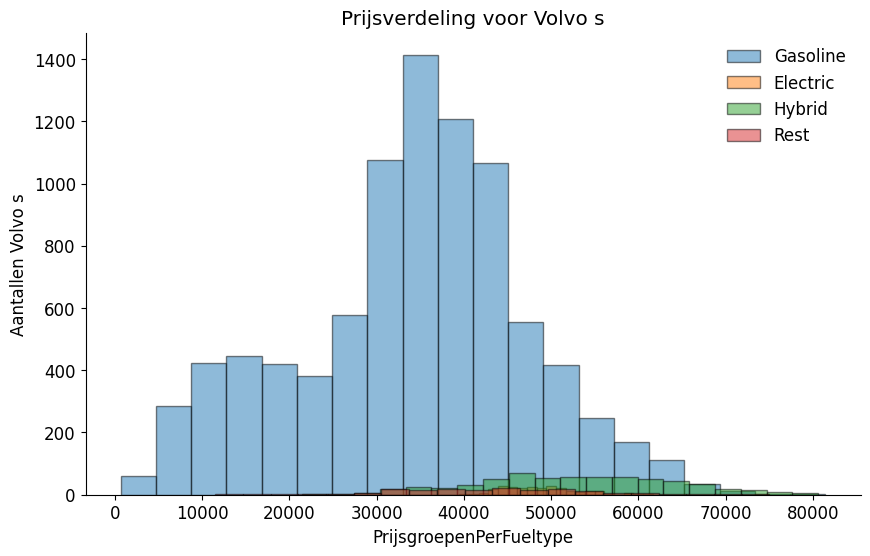

In [24]:

plt.hist(selection_gasoline['price'], bins=20, alpha=0.5, label='Gasoline', edgecolor='black')
plt.hist(selection_electric['price'], bins=20, alpha=0.5, label='Electric', edgecolor='black')
plt.hist(selection_hybrid['price'], bins=20, alpha=0.5, label='Hybrid', edgecolor='black')
plt.hist(selection_rest['price'], bins=20, alpha=0.5, label='Rest', edgecolor='black')

plt.xlabel('PrijsgroepenPerFueltype')
plt.ylabel('Aantallen Volvo ''s')
plt.title('Prijsverdeling voor Volvo ''s')

plt.legend()
                  
plt.show()

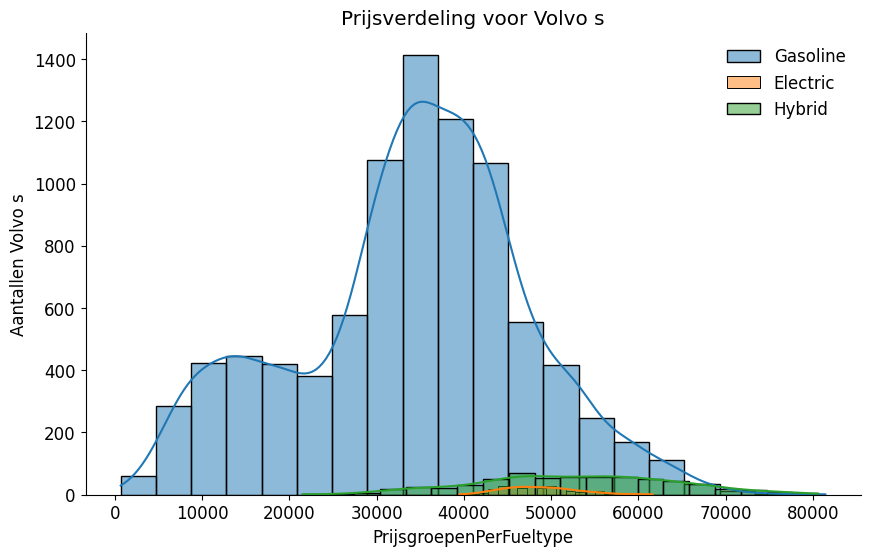

In [25]:
aant_bins = 20
sns.histplot(data=selection_gasoline['price'], bins=aant_bins, kde =True, label='Gasoline')
sns.histplot(data=selection_electric['price'], bins=aant_bins, kde =True, label='Electric')
sns.histplot(data=selection_hybrid['price'], bins=aant_bins, kde =True, label='Hybrid')

plt.xlabel('PrijsgroepenPerFueltype')
plt.ylabel('Aantallen Volvo ''s')
plt.title('Prijsverdeling voor Volvo ''s')

plt.legend()
          

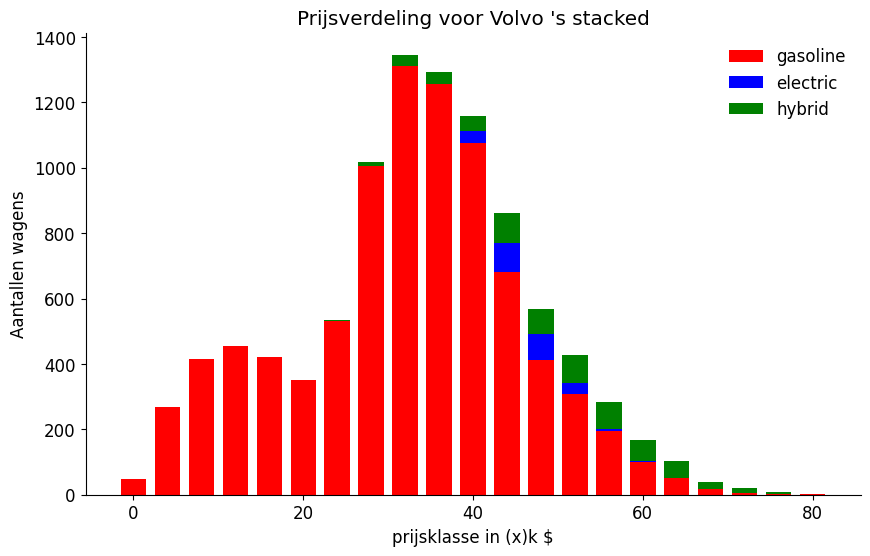

In [26]:
#  creating a stacked bar chart over price distribution
y1 = selection_gasoline.groupby('price_group')['fuel_type'].count().reset_index('price_group')
y2 = selection_electric.groupby('price_group')['fuel_type'].count().reset_index('price_group')
y3 = selection_hybrid.groupby('price_group')['fuel_type'].count().reset_index('price_group')

y1y2y3 = pd.merge(y1, y2, on='price_group', how='left')
y1y2y3.rename(columns={'fuel_type_x': 'gasoline', 'fuel_type_y': 'electric'}, inplace=True)
y1y2y3 = pd.merge(y1y2y3, y3, on='price_group', how='left')
y1y2y3.rename(columns={'fuel_type': 'hybrid'}, inplace=True)
y1y2y3.fillna(0, inplace=True)
y1y2y3 = y1y2y3.sort_values(by='price_group')
y1y2y3['price_group'] = (y1y2y3['price_group'] * interval_width) // 1000

y1 = y1y2y3['gasoline'].tolist()
y2 = y1y2y3['electric'].tolist()
y3 = y1y2y3['hybrid'].tolist()
x = y1y2y3['price_group'].tolist() 

bar_width = 3
plt.bar(x, y1, color='r', label='gasoline', width= bar_width)
plt.bar(x, y2, bottom=y1, color='b', label='electric', width= bar_width)
plt.bar(x, y3, bottom=np.array(y1) + np.array(y2), color='g', label='hybrid', width= bar_width) 

plt.title("Prijsverdeling voor Volvo 's stacked")
plt.xlabel('prijsklasse in (x)k $')
plt.ylabel('Aantallen wagens')
plt.xticks()
plt.legend()
plt.show()

## Vraag 5 : Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

### Antwoord


<span style="color:CadetBlue">  
  
- Er van uitgaande dat ENKEL over Volvo's wordt gesproken.  

- op deel vraag 5.1: ONWAAR (zie boxplots)
De box voor elektrische wagens (over dezelfde linker as) is kleiner (minder hoog,  
interkwartiel afstand is kleiner) en dus is er minder spreiding.  
IQR elektrische wagens, mediaan 48363 voor 50% van de elektrische wagens,   
IQR benzine wagens mediaan 35000 voor 50% van de benzine wagens, 

- op deel vraag 5.2: ONWAAR(zie ecdf)   
Op 50k hebben we 63% van de elektrische wagens en 89% van de benzine wagens.  
Kans op benzine wagen voorkomen van 50k is groter dan op een voorkomen van een 50k elektrische wagen.  

- op deel vraag 5.3: WAAR (zie ecdf)  
Van de elektrische wagens kosten 37% meer dan 50k terwijl voor benzine wagens slechts 11% meer dan 50k kost.   
Kans op elektrische wagen die meer dan >50k kost is groter dan benzine wagen die meer dan 50k kost.
... 

- Opmerkingen ecdf grafiek  
ik veronderstel 0.63, zonder te berekenen, maar wel op zicht, voor elektrische wagens  
ik veronderstel 0.89, zonder te berekenen, maar wel op zicht, voor benzine wagens


</span>

### Onderzoek

elektrische Volvo mu = 48788.39, sigma = 4162.03, median = 48363.00, q1 perc = 45897.00, q3 perc = 51193.00 
gasoline Volvo mu = 34050.99, sigma = 13296.47, median = 35000.00, q1 perc = 26799.50, q3 perc = 42689.50 


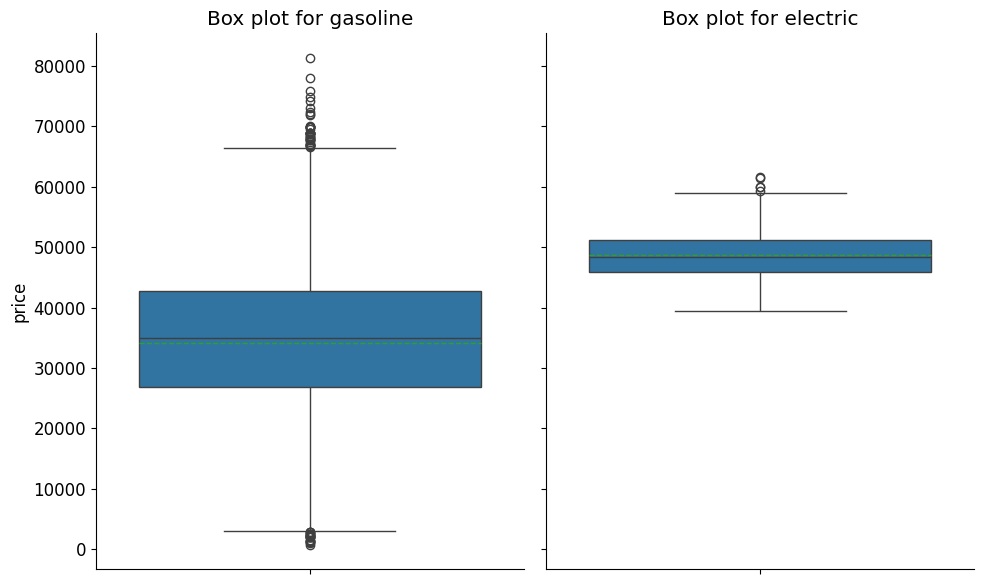

In [27]:
mu_electric = selection_electric['price'].mean()
sigma_electric = selection_electric['price'].std()
median_electric = selection_electric['price'].median()
q1_percentile_electric = selection_electric['price'].quantile(0.25)
q3_percentile_electric = selection_electric['price'].quantile(0.75)
print(f'elektrische Volvo mu = {mu_electric:.2f}, sigma = {sigma_electric:.2f}, median = {median_electric:.2f}, q1 perc = {q1_percentile_electric:.2f}, q3 perc = {q3_percentile_electric:.2f} ')

mu_gasoline = selection_gasoline['price'].mean()
sigma_gasoline = selection_gasoline['price'].std()
median_gasoline = selection_gasoline['price'].median()
q1_percentile_gasoline = selection_gasoline['price'].quantile(0.25)
q3_percentile_gasoline = selection_gasoline['price'].quantile(0.75)
print(f'gasoline Volvo mu = {mu_gasoline:.2f}, sigma = {sigma_gasoline:.2f}, median = {median_gasoline:.2f}, q1 perc = {q1_percentile_gasoline:.2f}, q3 perc = {q3_percentile_gasoline:.2f} ')

# mu_hybrid = selection_hybrid['price'].mean()
# sigma_hybrid = selection_hybrid['price'].std()
# print(f'hybrid Volvo mu = {mu_hybrid:.2f}, sigma = {sigma_hybrid:.2f}')

fig, axes = plt.subplots(1, 2, sharey=True)
# fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(data=selection_gasoline['price'], ax=axes[0], showmeans=True, meanline=True)
sns.boxplot(data=selection_electric['price'], ax=axes[1], showmeans=True, meanline=True)
# sns.boxplot(data=selection_hybrid['price'], ax=axes[2])
# sns.boxplot(data=selection_diesel['price'], ax=axes[3])
# sns.boxplot(data=selection_E85_Flex_Fuel['price'], ax=axes[4])
# sns.boxplot(data=selection_rest['price'], ax=axes[3])

axes[0].set_title('Box plot for gasoline')
axes[1].set_title('Box plot for electric')
# axes[2].set_title('Box plot for hybrid')
# axes[3].set_title('Box plot for diesel')
# axes[4].set_title('Box plot for E85 Flex Fuel')
# axes[3].set_title('Box plot for rest')

# plt.legend()
plt.tight_layout()                  
plt.show()



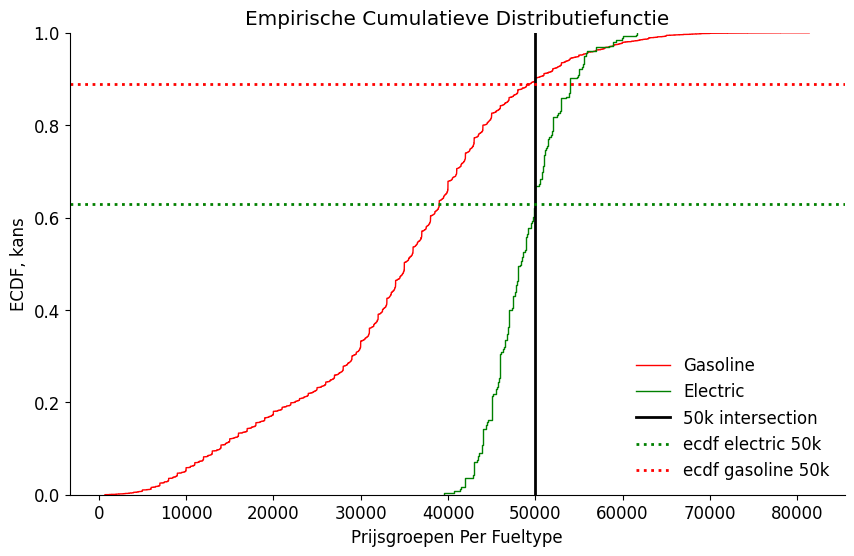

In [28]:
sns.ecdfplot(data=selection_gasoline, x='price', color='r', label='Gasoline', linewidth=1)
sns.ecdfplot(data=selection_electric, x='price', color='g', label='Electric', linewidth=1)
# sns.ecdfplot(data=selection_hybrid, x='price', color='b', label='Hybrid', linewidth=1)
# sns.ecdfplot(data=selection_rest, x='price', color='y', label='Rest', linewidth=1)

#  ik veronderstel 0.63, zonder te berekenen, op zicht, voor elektrische wagens
#  ik veronderstel 0.89, zonder te berekenen, op zicht, voor benzine wagens
plt.axvline(50000, linewidth=2,color='black', label = f'50k intersection')
plt.axhline(0.63, linewidth=2,color='green', linestyle = ':', label = f'ecdf electric 50k')
plt.axhline(0.89, linewidth=2,color='red', linestyle = ':', label = f'ecdf gasoline 50k')

plt.xlabel('Prijsgroepen Per Fueltype')
plt.ylabel('ECDF, kans')
plt.title('Empirische Cumulatieve Distributiefunctie')
plt.legend()
          
plt.show()

<!--  voor mezelf, vergelijing boxplot met PDF -->
Dit is een ingecopieerde afbeelding, ter vergelijking en niet in relatie tot de data
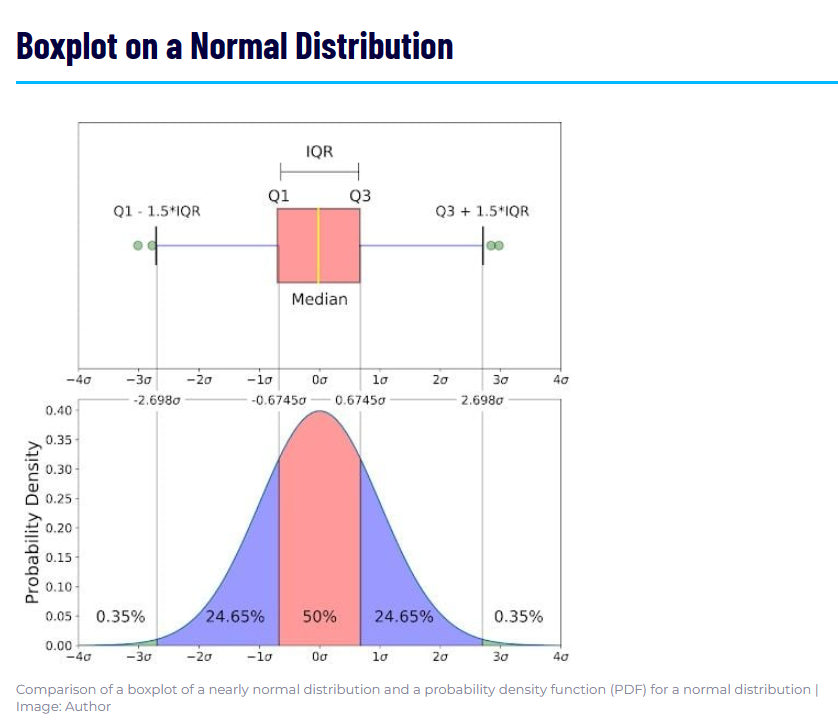

## Vraag 6 : Maak een visualizatie om het verband tussen mileage & price te tonen?

### Antwoord

<span style="color:CadetBlue">  

Ik heb de volgende grafiektypes geprobeerd/gebruikt om verband aan te tonen:

scatterplot: eerst alle gegevens, dan de outliers weggewerkt en 98% percentiel gebruikt  
--> Resultaat : hogere mileage geeft lagere prijs, de scatter is breed en funnelt naargelang de mileage stijgt

heatmap (alle numerische kolommen)  
--> Ik vermoed dat enkel getallen groter dan 0,50 zin hebben  
--> Op die manier vermoed ik dat er enkel een verband is tusseen year, mileage en price  
--> Of single_ownership en aantal reviews zin hebben < .5 weet ik niet.

regplot (mileage en price), regressieplot  
--> zelfde resultaat als scatterplot, met een mooi rood lijntje

pairplot (mileage, price en year)  
--> Zet de (numerieke) attributen tegenover elkaar af  
--> De attributen tegenover zichzelf tonen de piek 
--> De attributen t.o.v. de niet zichzelf attributen geven meer info :  price/year en mileage/year 

</span>

### Onderzoek

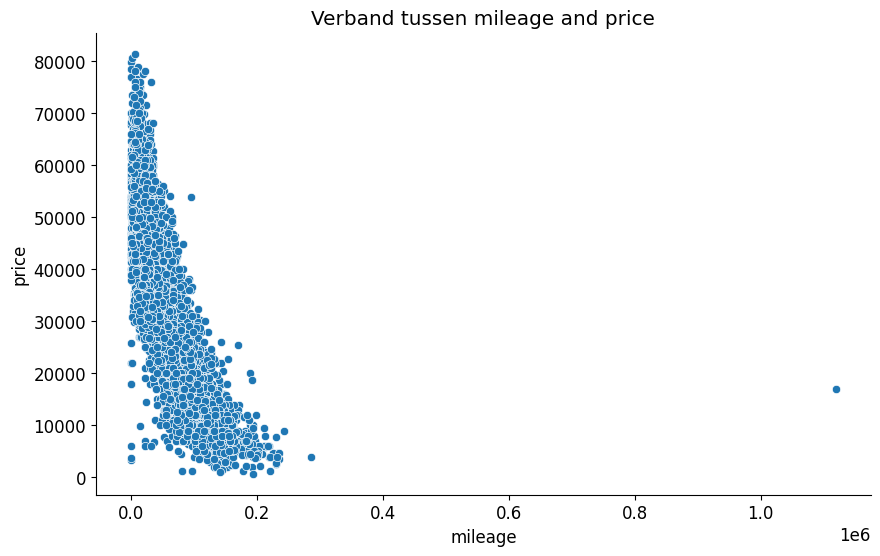

In [29]:
# SNS scatterplot mét outliers

sns.scatterplot(x='mileage', y='price', data=df_volvos)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Verband tussen mileage and price')
plt.show()

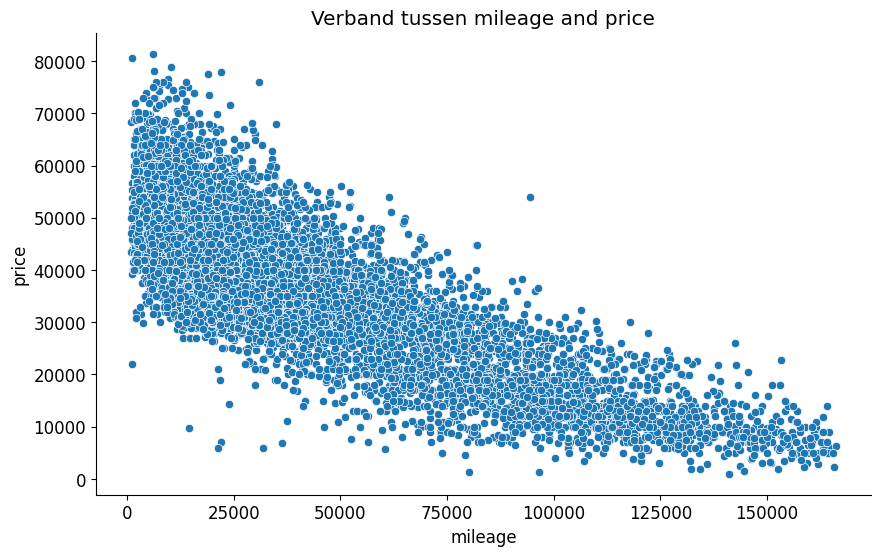

In [30]:
# SNS scatterplot minus de 1% outliers
# misschien beter outliers identificeren adhv ouderdom ?  

p5 = df_volvos['mileage'].quantile(0.01)
p95 = df_volvos['mileage'].quantile(0.99)

# Remove outliers that fall outside the 5th and 95th percentiles
df_volvos_no_outliers = df_volvos[(df_volvos['mileage'] >= p5) & (df_volvos['mileage'] <= p95)]

sns.scatterplot(x='mileage', y='price', data=df_volvos_no_outliers)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Verband tussen mileage and price')
plt.show()

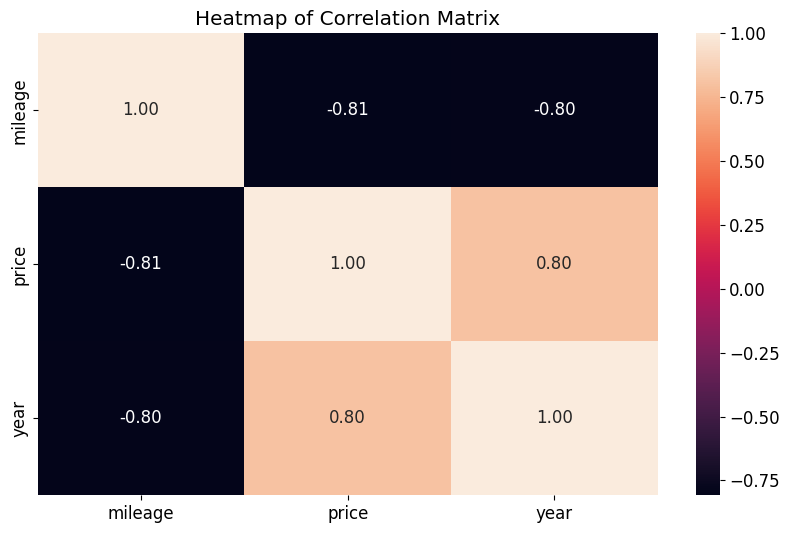

In [31]:
# SNS heatmap

# correlation_matrix = df_volvos_no_outliers[['mileage','price']].corr()
correlation_matrix = df_volvos_no_outliers[['mileage','price', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

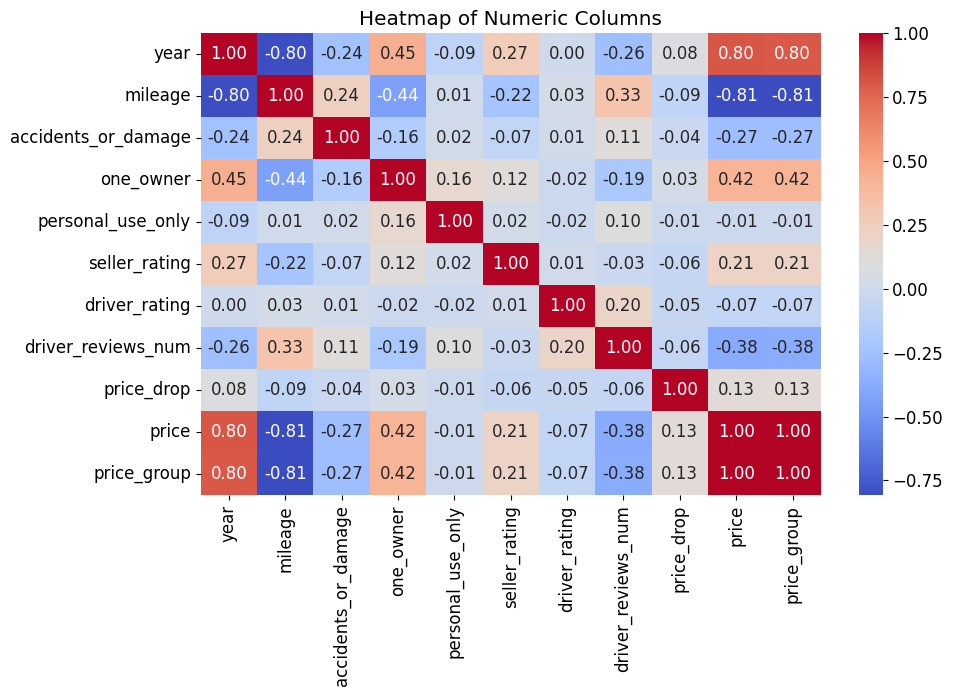

In [32]:
# SNS heatmap, met een selectie op dtype numerics
# Opmerking : data wrangler geeft toch wel grotere percentages missing data, hoe beïnvloedt dit de grafiek ?

df_volvos_no_outliers_numeric_only = df_volvos_no_outliers.select_dtypes(include='number')

# plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
sns.heatmap(df_volvos_no_outliers_numeric_only.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Columns')
plt.show()

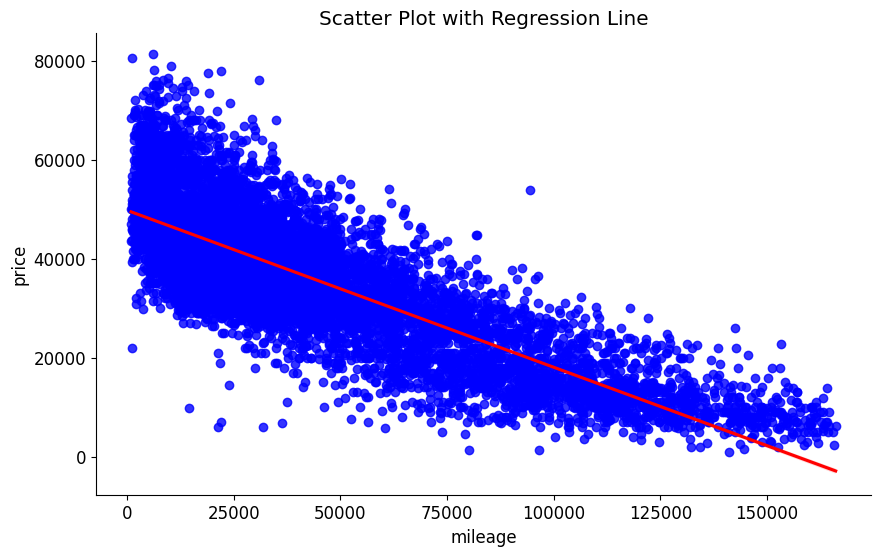

In [33]:
# SNS regplot, regressieplot

sns.regplot(x='mileage', y='price', data=df_volvos_no_outliers,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line')
plt.show()

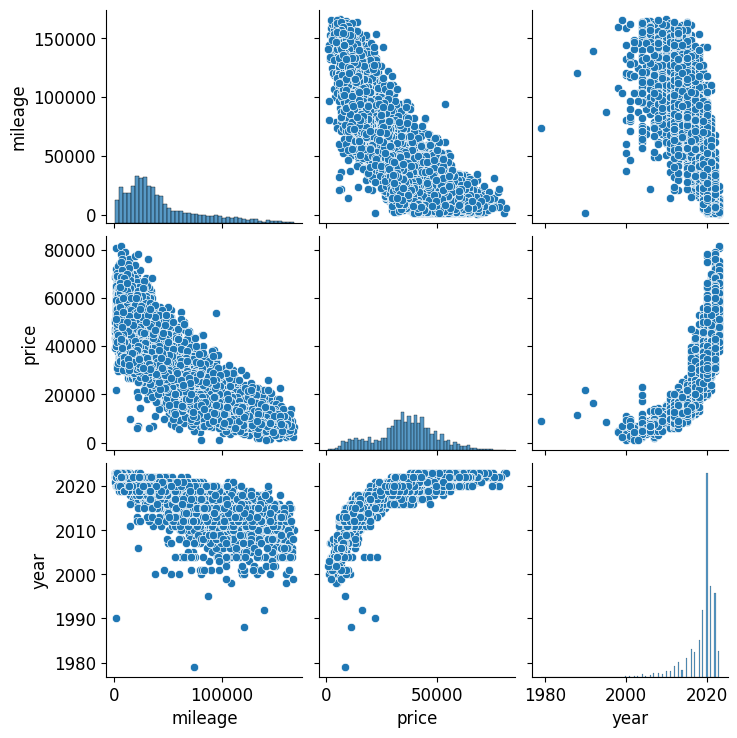

In [34]:
# SNS pairplot, veel plotjes ineens

sns.pairplot(df_volvos_no_outliers[['mileage','price', 'year']])

# sns.pairplot(df_volvos_no_outliers_numeric_only)
# sns.pairplot(df_volvos_no_outliers[['mileage','price', 'driver_reviews_num']])
# sns.pairplot(df_volvos_no_outliers[['mileage','price', 'fuel_type', 'year','exterior_color']])
# waarom werkt fuel_type, exterior_color, drivetrain niet .. enkel getallen, ordinaal (lager/hoger) ?? 
# sns.pairplot(df_volvos_no_outliers)
# grote afbeelding, zijn dit dan alle mogelijke paren ?

plt.show()

## Vraag 7 : Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

### Antwoord

<span style="color:CadetBlue">  
Centrale Limietstelling (CLS), bootstrapping en confidence intervallen

Zie geprogrammeerd voorbeeld met bootstrapping
</span>

### Onderzoek

In [35]:
# Calcultating CI for 1000, 500, 100 execution, with sample size 100%
#  make variants on nr_of_executions, sample_size_factor and ci_interval

nr_of_executions = 100
use_random_seed = 'not random'
used_data_set = selection_electric
used_data_set_column = 'price'
sample_size_factor = 1.0
ci_interval = [2.5, 97.5]
calculated_means = np.empty(nr_of_executions)

nr_of_executions_1 = 700
sample_size_factor_1 = 1.0
ci_interval_1 = [2.5, 97.5]
calculated_confidence_interval_1, calculated_means_1 = (
    vbCI.bereken_confidence_interval(nr_of_executions_1,
                                use_random_seed,
                                used_data_set,
                                used_data_set_column,
                                sample_size_factor_1,
                                ci_interval_1)
    )

nr_of_executions_2 = 500
sample_size_factor_2 = 1.0
ci_interval_2 = [2.5, 97.5]
calculated_confidence_interval_2, calculated_means_2 = (
    vbCI.bereken_confidence_interval(nr_of_executions_2,
                                use_random_seed,
                                used_data_set,
                                used_data_set_column,
                                sample_size_factor_2,
                                ci_interval_2)
    )

nr_of_executions_3 = 100
sample_size_factor_3 = 1.0
ci_interval_3 = [2.5, 97.5]
calculated_confidence_interval_3, calculated_means_3 = (
    vbCI.bereken_confidence_interval(nr_of_executions_3,
                                use_random_seed,
                                used_data_set,
                                used_data_set_column,
                                sample_size_factor_3,
                                ci_interval_3)
    )

Set 1 : interval=[2.5, 97.5], exec=700, size=1.0 : [48250.55, 49296.51]
Set 2 : interval=[2.5, 97.5], exec=500, size=1.0 : [48217.37, 49293.28]
Set 3 : interval=[2.5, 97.5], exec=100, size=1.0 : [48276.68, 49329.88]


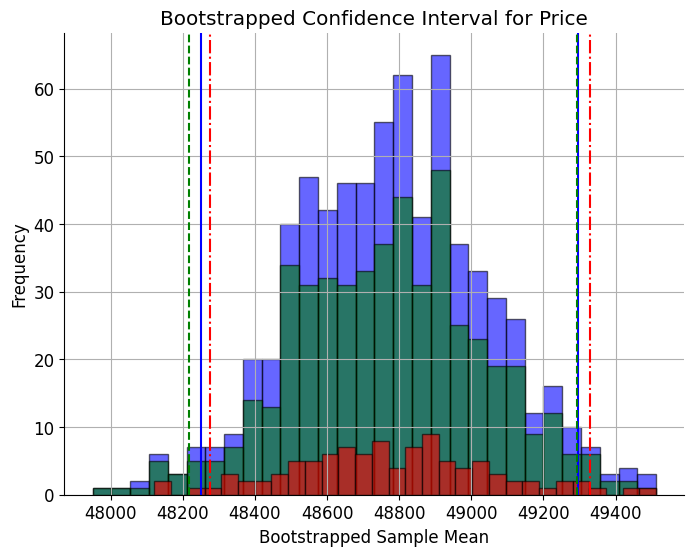

In [36]:
# Create a histogram of bootstrapped means here above

print(f"Set 1 : interval={ci_interval_1}, exec={nr_of_executions_1}, size={sample_size_factor_1} : "
      f"[{calculated_confidence_interval_1[0]:.2f}, {calculated_confidence_interval_1[1]:.2f}]")
print(f"Set 2 : interval={ci_interval_2}, exec={nr_of_executions_2}, size={sample_size_factor_2} : "
      f"[{calculated_confidence_interval_2[0]:.2f}, {calculated_confidence_interval_2[1]:.2f}]")
print(f"Set 3 : interval={ci_interval_3}, exec={nr_of_executions_3}, size={sample_size_factor_3} : "
      f"[{calculated_confidence_interval_3[0]:.2f}, {calculated_confidence_interval_3[1]:.2f}]")

plt.figure(figsize=(8, 6))

plt.hist(calculated_means_1, bins=30, color='blue', edgecolor='black', alpha=0.6)
plt.axvline(calculated_confidence_interval_1[0], color='blue', 
            linestyle='-', label=f' {calculated_confidence_interval_1[0]:.2f}')
plt.axvline(calculated_confidence_interval_1[1], color='blue', 
            linestyle='-', label=f'ci 2 {calculated_confidence_interval_1[1]:.2f}')

plt.hist(calculated_means_2, bins=30, color='green', edgecolor='black', alpha=0.6)
plt.axvline(calculated_confidence_interval_2[0], color='green', 
            linestyle='--', label=f'ci 3 {calculated_confidence_interval_2[0]:.2f}')
plt.axvline(calculated_confidence_interval_2[1], color='green', 
            linestyle='--', label=f'ci 3 {calculated_confidence_interval_2[1]:.2f}')

plt.hist(calculated_means_3, bins=30, color='red', edgecolor='black', alpha=0.6)
plt.axvline(calculated_confidence_interval_3[0], color='red', 
            linestyle='-.', label=f'ci 4 {calculated_confidence_interval_3[0]:.2f}')
plt.axvline(calculated_confidence_interval_3[1], color='red', 
            linestyle='-.', label=f'ci 4 {calculated_confidence_interval_3[1]:.2f}')

plt.xlabel('Bootstrapped Sample Mean')
plt.ylabel('Frequency')
plt.title('Bootstrapped Confidence Interval for Price')
# plt.legend()
plt.grid(True)
plt.show()

# Z : Junk, try out en 'not to be forgotten' opmerkingen

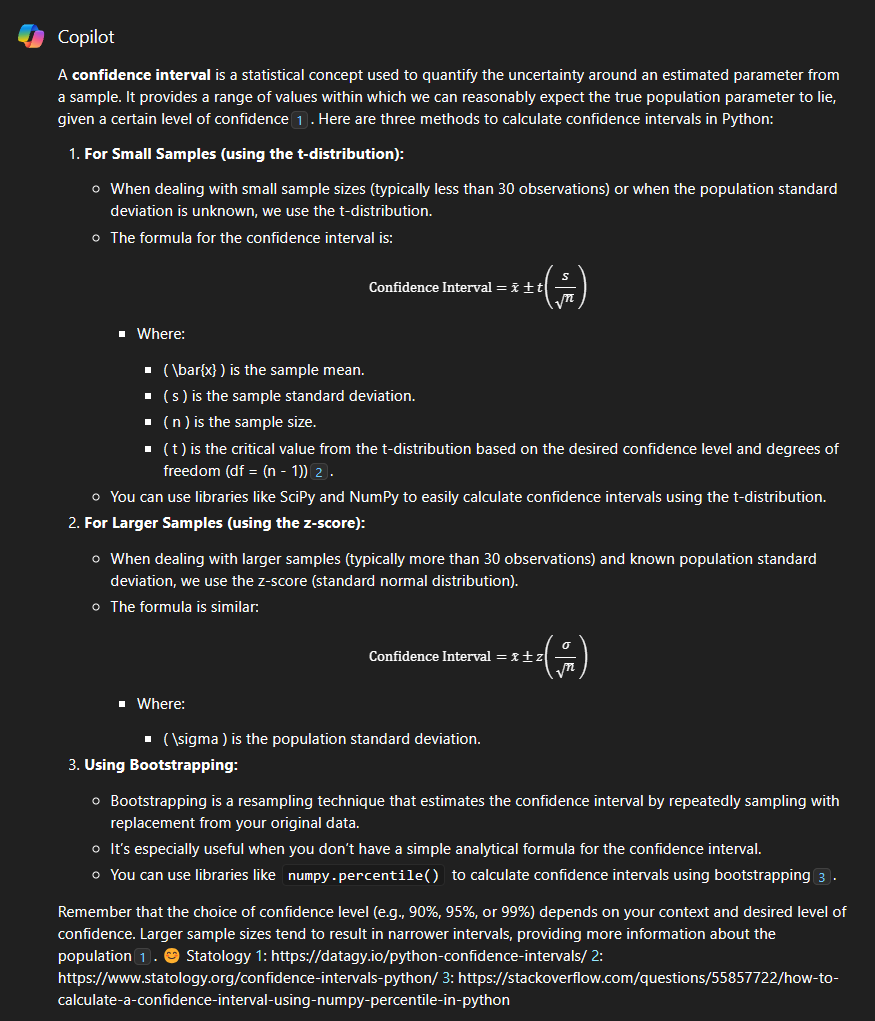

In [37]:
# Confidence interval berekeken op basis van normaal verdeling

# Calculate sample mean and standard deviation
sample_mean = selection_electric['price'].mean()
sample_std = selection_electric['price'].std()

# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical z-value (two-tailed) : normaal gedistribueerde data
n = len(selection_electric)
z_critical = st.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_critical * (sample_std / np.sqrt(n))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level*100:.0f}%): [{lower_bound:.2f}, {upper_bound:.2f}]")

Sample Mean: 48788.39
Confidence Interval (95%): [48275.54, 49301.24]


In [38]:
# Confidence interval berekeken op basis van t - verdeling

# Calculate sample mean and standard deviation
sample_mean = selection_electric['price'].mean()
sample_std = selection_electric['price'].std()

# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical t-value (two-tailed)
n = len(selection_electric)
degrees_of_freedom = n - 1
t_critical = st.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level*100:.0f}%): [{lower_bound:.2f}, {upper_bound:.2f}]")

Sample Mean: 48788.39
Confidence Interval (95%): [48273.06, 49303.72]


In [39]:
# Bootstrapping gebruiken om het confidence interval te berekenen

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Initialize an empty array to store bootstrapped sample means
bootstrapped_means_1 = np.empty(n_bootstrap_samples)

# Perform bootstrapping
np.random.seed(42)
sample_size_factor = 1
for i in range(n_bootstrap_samples):
    bootstrapped_sample_1 = np.random.choice(selection_electric['price'], 
                                           size=int(len(selection_electric)*sample_size_factor), 
                                           replace=True)
    bootstrapped_means_1[i] = bootstrapped_sample_1.mean()

# Calculate the 95% confidence interval
confidence_interval_1 = np.percentile(bootstrapped_means_1, [2.5, 97.5])

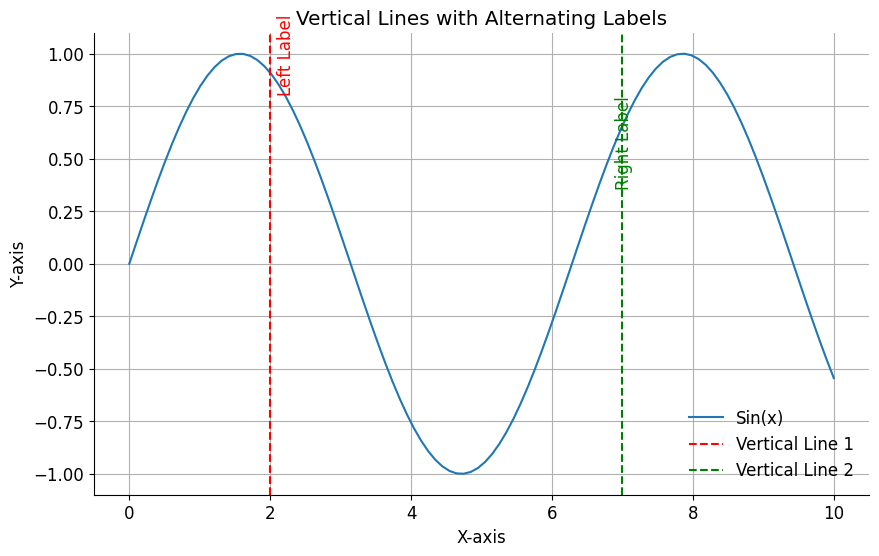

In [40]:

# Example data
x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values)

# Create a plot
plt.plot(x_values, y_values, label='Sin(x)')
plt.axvline(x=2, color='red', linestyle='--', label='Vertical Line 1')
plt.axvline(x=7, color='green', linestyle='--', label='Vertical Line 2')

# Annotate the vertical lines
plt.text(2.1, 0.8, 'Left Label', color='red', rotation=90, va='bottom')
plt.text(6.9, 0.8, 'Right Label', color='green', rotation=90, va='top')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vertical Lines with Alternating Labels')
plt.legend()
plt.grid(True)
plt.show()